In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import shutil
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.layers import *
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
import pickle

In [2]:
# Names of the pokemons
print(len(os.listdir("../input/pokemonclassification/PokemonData")))
print(os.listdir("../input/pokemonclassification/PokemonData"))

150
['Golbat', 'Beedrill', 'Caterpie', 'Clefable', 'Raichu', 'Sandslash', 'Metapod', 'Drowzee', 'Oddish', 'Charizard', 'Tauros', 'Ponyta', 'Primeape', 'Spearow', 'Mankey', 'Poliwag', 'Krabby', 'Rattata', 'Tentacruel', 'Graveler', 'Koffing', 'Zapdos', 'Articuno', 'Psyduck', 'Bellsprout', 'Lapras', 'Butterfree', 'Weezing', 'Abra', 'Muk', 'Cloyster', 'Porygon', 'Flareon', 'Jigglypuff', 'Raticate', 'Venusaur', 'Dewgong', 'Horsea', 'Rhydon', 'Omanyte', 'Exeggcute', 'Kabuto', 'Ditto', 'Growlithe', 'Mew', 'Electrode', 'Vileplume', 'Seaking', 'Exeggutor', 'Electabuzz', 'Chansey', 'Magmar', 'Haunter', 'Ninetales', 'Clefairy', 'Gyarados', 'Tangela', 'Marowak', 'Snorlax', 'Nidoqueen', 'Alolan Sandslash', 'Hitmonchan', 'Ekans', 'Sandshrew', 'Jolteon', 'Kabutops', 'Lickitung', 'Pidgeotto', 'Shellder', 'Slowpoke', 'Pikachu', 'Poliwrath', 'Fearow', 'Magnemite', 'Hitmonlee', 'Machoke', 'Poliwhirl', 'Magneton', 'Diglett', 'Venonat', 'Kakuna', 'Eevee', 'Ivysaur', 'Doduo', 'Wigglytuff', 'Goldeen', 'Alaka

In [3]:
main_path = "../input/pokemonclassification/PokemonData"
pok_names = []
pok_freq = []
for p_name in os.listdir(main_path):
    file_name = os.path.join(main_path, p_name)
    pok_names.append(p_name)
    pok_freq.append(len(os.listdir(file_name)))

print(len(pok_names), len(pok_freq))

150 150


## Data Visualisation

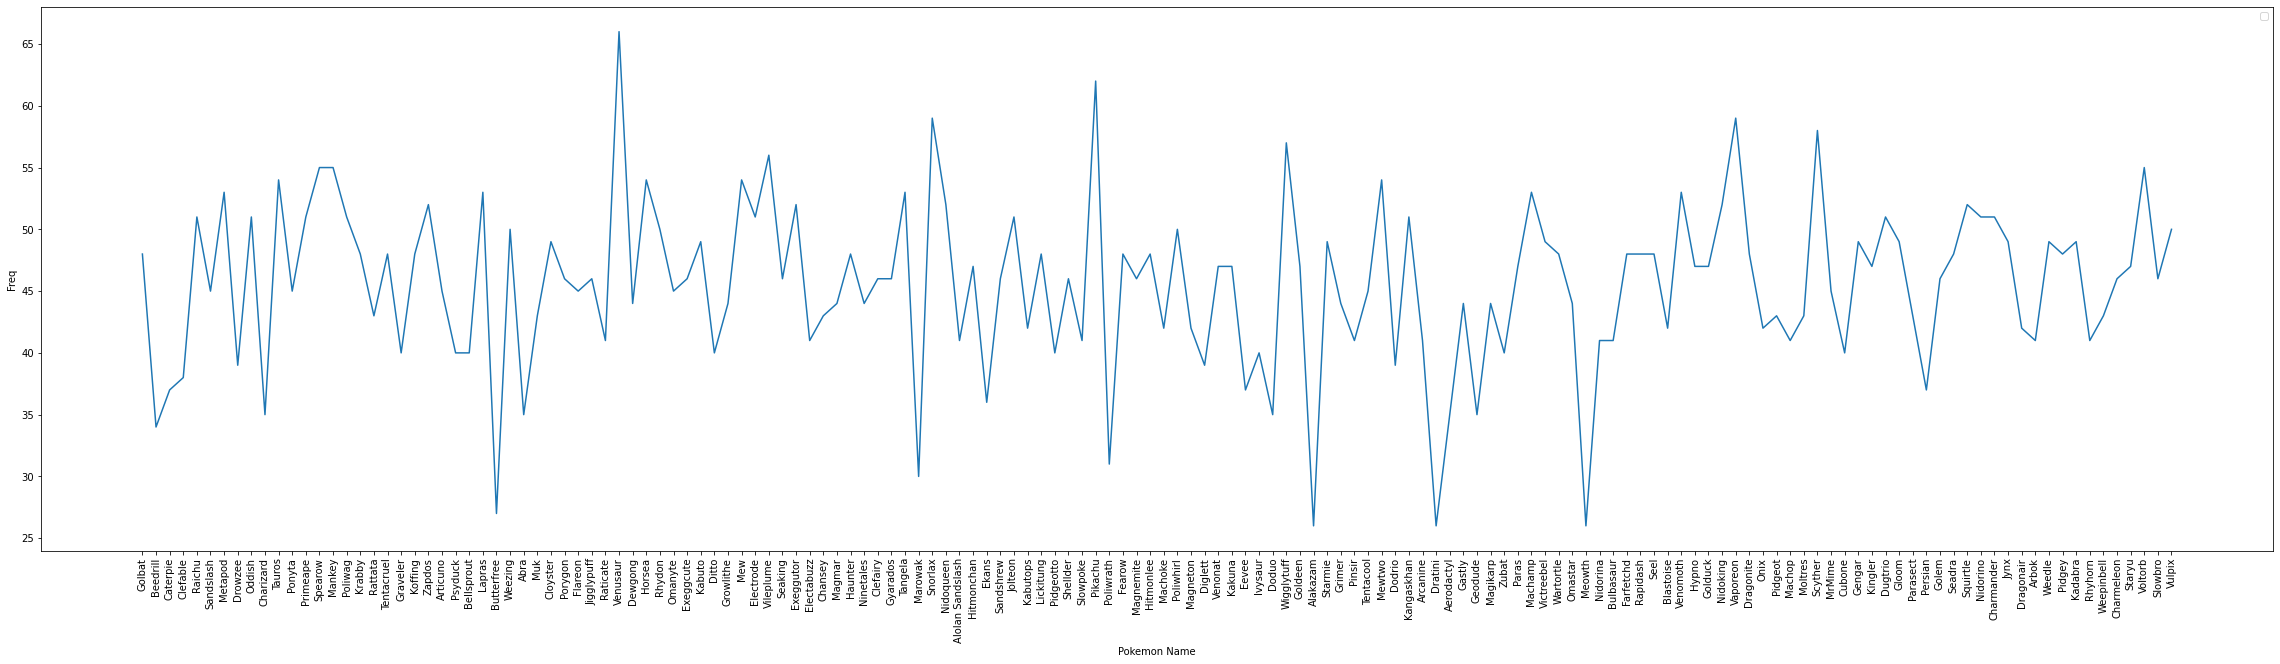

In [4]:
plt.figure(figsize=(40,10))
plt.xticks(rotation=90)
plt.xlabel("Pokemon Name")
plt.ylabel("Freq")
plt.plot(pok_names, pok_freq)
plt.legend()
plt.show()

## Dividing Data into Training and Validation Sets

In [5]:
os.mkdir("OUTPUTS")
os.mkdir(os.path.join("OUTPUTS","model")) # for saving the model

os.mkdir(os.path.join("OUTPUTS","train"))
for p_name in pok_names:
    os.mkdir(os.path.join("OUTPUTS","train", p_name))

os.mkdir(os.path.join("OUTPUTS","val"))
for p_name in pok_names:
    os.mkdir(os.path.join("OUTPUTS","val", p_name))

In [6]:
# Validation : 15%
# Training : 85%
for file_name in os.listdir(main_path):
    print("Validation Images for {}".format(file_name))
    
    for img_path in os.listdir(os.path.join(main_path, file_name)):
        
        if np.random.rand() <= 0.15:
            # Then transfer to validation dir
            
            src = os.path.join(main_path, file_name, img_path)
            dst = os.path.join("OUTPUTS", "val", file_name, img_path)
            shutil.copy(src, dst)
            # print("Src : {} and Dst : {}".format(src,dst))
            
        else:
            # Transfer to training dir
            
            src = os.path.join(main_path, file_name, img_path)
            dst = os.path.join("OUTPUTS", "train", file_name, img_path)
            shutil.copy(src, dst)
        

Validation Images for Golbat
Validation Images for Beedrill
Validation Images for Caterpie
Validation Images for Clefable
Validation Images for Raichu
Validation Images for Sandslash
Validation Images for Metapod
Validation Images for Drowzee
Validation Images for Oddish
Validation Images for Charizard
Validation Images for Tauros
Validation Images for Ponyta
Validation Images for Primeape
Validation Images for Spearow
Validation Images for Mankey
Validation Images for Poliwag
Validation Images for Krabby
Validation Images for Rattata
Validation Images for Tentacruel
Validation Images for Graveler
Validation Images for Koffing
Validation Images for Zapdos
Validation Images for Articuno
Validation Images for Psyduck
Validation Images for Bellsprout
Validation Images for Lapras
Validation Images for Butterfree
Validation Images for Weezing
Validation Images for Abra
Validation Images for Muk
Validation Images for Cloyster
Validation Images for Porygon
Validation Images for Flareon
Valida

## Creating Image Generator and Performing Image Augmentation

In [7]:
# Function which normalizes the pixels from [0.0, 255.0] to [-1.0, 1.0]
def prep_fn(img):
    img = img.astype(np.float32) / 255.0
    img = (img - 0.5) * 2
    return img

train_data_generator = ImageDataGenerator(preprocessing_function=prep_fn,
                                          rotation_range = 15,
                                          horizontal_flip = True)

train_gen = train_data_generator.flow_from_directory(
    os.path.join("OUTPUTS","train"),
    batch_size=32,
    target_size = (400,400),
    class_mode = 'categorical',
    shuffle = True
)

val_data_generator = ImageDataGenerator(preprocessing_function=prep_fn)

val_gen = val_data_generator.flow_from_directory(
    os.path.join("OUTPUTS","val"),
    batch_size=16,
    target_size = (400,400),
    class_mode = 'categorical'
)

Found 5826 images belonging to 150 classes.
Found 994 images belonging to 150 classes.


## Displaying A Batch

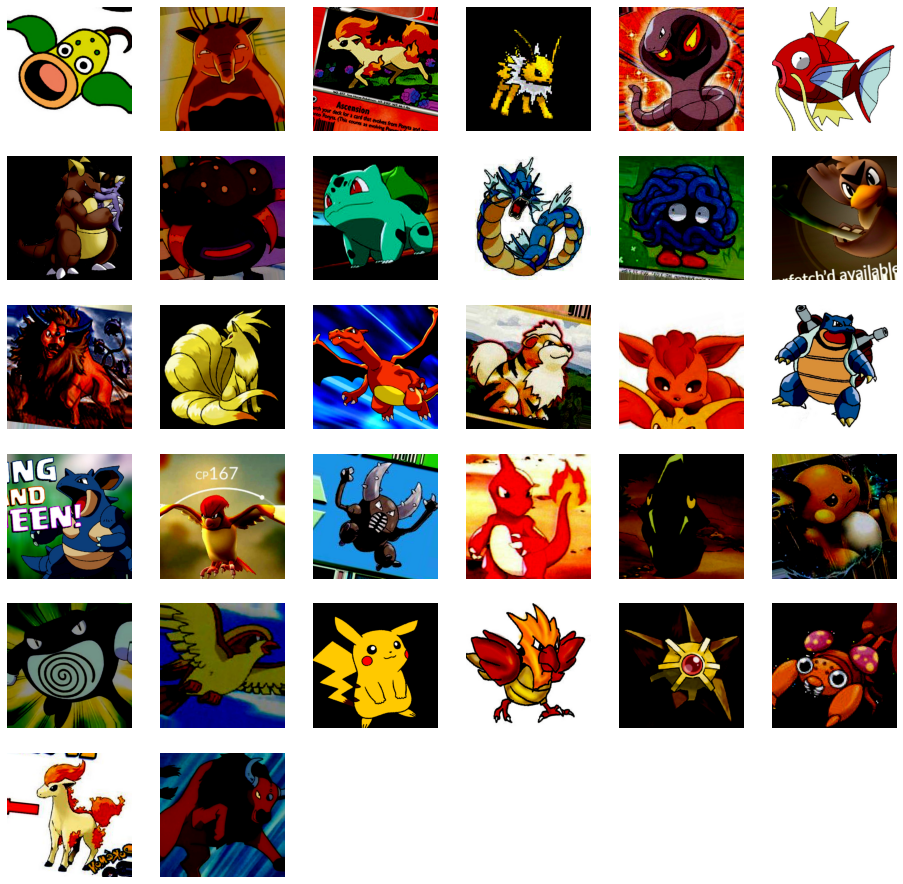

In [8]:
for x,y in train_gen:
    
    plt.figure(figsize=(16,16))
    # Display a batch
    for i in range(32):
        plt.subplot(6,6,i+1)
        plt.imshow(x[i])
        plt.axis('off')

    plt.show()
    break

# **Creating and Training the MODEL**

In [9]:
model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(400, 400, 3)
)

94773248/94765736 [==============================] - 1s 0us/step


In [10]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(150, activation='softmax')(av1)

model_new = Model(inputs= model.input, outputs = fc1)

In [11]:
# model_new.summary()
sgd = SGD(learning_rate=0.01, momentum=0.9)

model_new.compile(
    loss= 'categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy']
)

In [12]:
# Creating a Model Checkpoint
# It will save the best model
checkpoint = ModelCheckpoint(
    os.path.join("OUTPUTS","model","best_model.h5"),
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch"
)

In [13]:
hist = model_new.fit_generator(
    train_gen,
    steps_per_epoch=len(train_gen), # it is equal to #samples/batch_size
    epochs=15,
    validation_data=val_gen,
    validation_steps=len(val_gen),
    callbacks=[checkpoint]
)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
183/183 [==============================] - 272s 1s/step - loss: 3.3493 - accuracy: 0.3137 - val_loss: 5.1731 - val_accuracy: 0.0171
Epoch 2/15
183/183 [==============================] - 263s 1s/step - loss: 0.3607 - accuracy: 0.9083 - val_loss: 3.9717 - val_accuracy: 0.1630
Epoch 3/15
183/183 [==============================] - 264s 1s/step - loss: 0.1178 - accuracy: 0.9691 - val_loss: 1.3667 - val_accuracy: 0.6791
Epoch 4/15
183/183 [==============================] - 267s 1s/step - loss: 0.1003 - accuracy: 0.9769 - val_loss: 0.4129 - val_accuracy: 0.8913
Epoch 5/15
183/183 [==============================] - 265s 1s/step - loss: 0.0339 - accuracy: 0.9932 - val_loss: 0.3581 - val_accuracy: 0.8994
Epoch 6/15
183/183 [==============================] - 268s 1s/step - loss: 0.0735 - accuracy: 0.9841 - val_loss: 0.2965 - val_accuracy: 0.9245
Epoch 7/15
183/183 [==============================] - 270s 1s/step - loss: 0.0854 - accuracy: 0.9785 - val_loss: 0.1829 - val_accuracy: 0.9487

In [14]:
h = hist.history

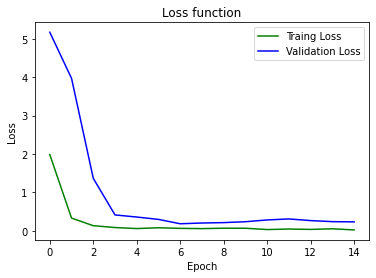

In [15]:
# Loss
plt.plot(h["loss"], color="green", label="Traing Loss")
plt.plot(h["val_loss"], color="blue", label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss function")
plt.legend()
plt.show()

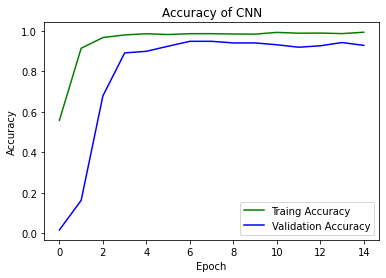

In [16]:
# Accuracy
plt.plot(h["accuracy"], color="green", label="Traing Accuracy")
plt.plot(h["val_accuracy"], color="blue", label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy of CNN")
plt.legend()
plt.show()

## Loading the Best Model

In [17]:
model_new.load_weights("OUTPUTS/model/best_model.h5")
model_new.save("BEST_MODEL.h5")

## Some Predictions

In [18]:
pok2idx = dict(val_gen.class_indices)
idx2pok = {value: key for key, value in pok2idx.items()}

# Saving these dictionaries
with open("pok2idx.pkl", "wb") as f:
    pickle.dump(pok2idx, f)
    
with open("idx2pok.pkl", "wb") as f:
    pickle.dump(idx2pok, f)

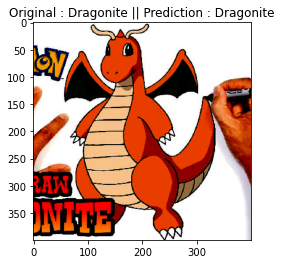

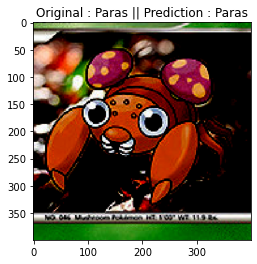

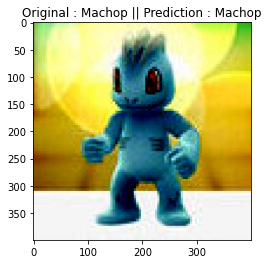

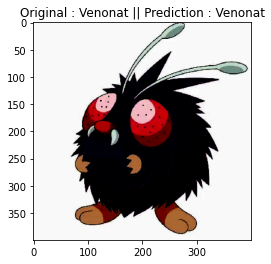

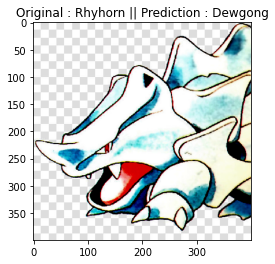

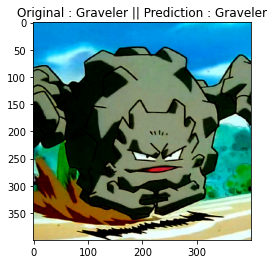

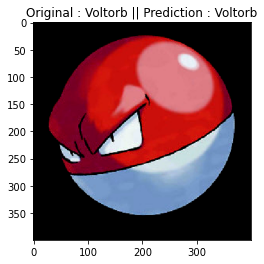

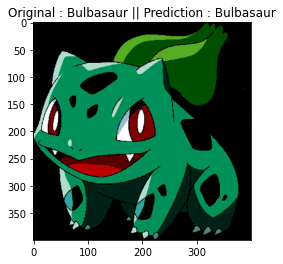

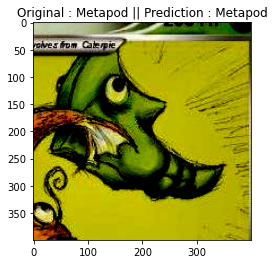

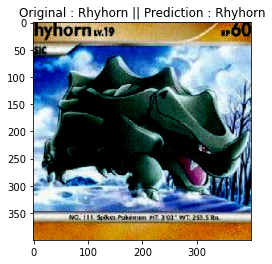

In [19]:
for x,y in val_gen:
    
    for i in range(10):
        plt.imshow(x[i])
        idx, = np.where(y[i] == 1)
        org = idx2pok[idx[0]]
        pred = idx2pok[np.argmax(model_new.predict(x[i].reshape(1, 400, 400, 3)))]
        plt.title("Original : {} || Prediction : {}".format(org, pred))
        plt.show()
    break